<a href="https://colab.research.google.com/github/127-0-0-vvk/histogram_equalization/blob/main/histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram equalization
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb)



In [ ]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg".split()
    )



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio as iio


figsize = (10, 10)


First, read the image as grayscale



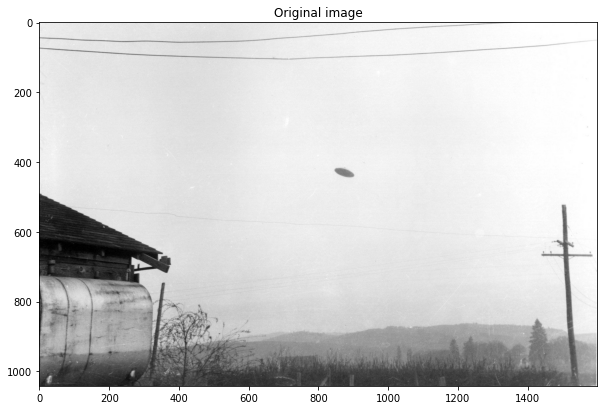

In [ ]:
# read as grayscale
I = iio.imread("/content/ufi.jpg")
plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()


Let's start by calculating and showing the original histogram


In [ ]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]


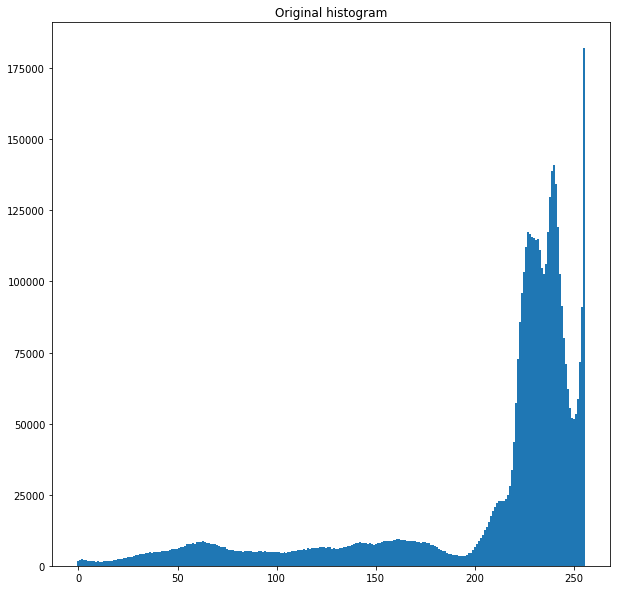

In [ ]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()



Normalize the histogram to gat a discrete PDF


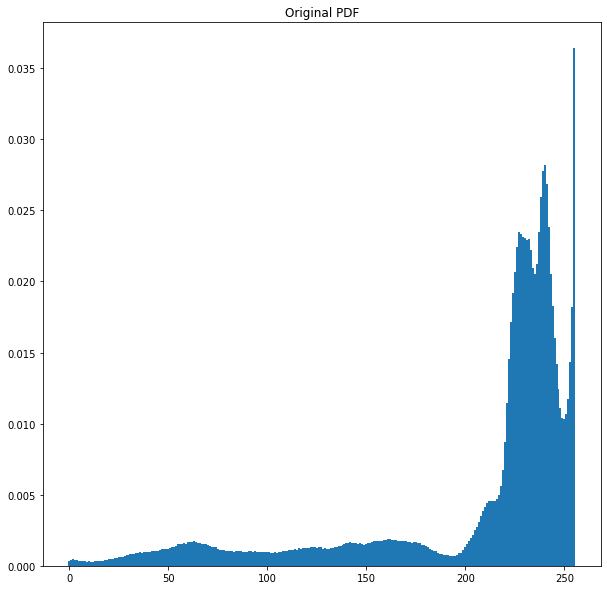

In [ ]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()



Get the CDF by calculating the cumulative sum of the pdf data


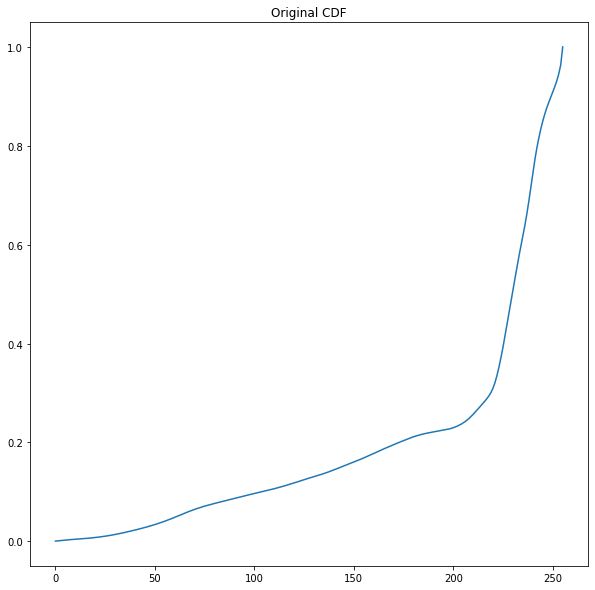

In [ ]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()



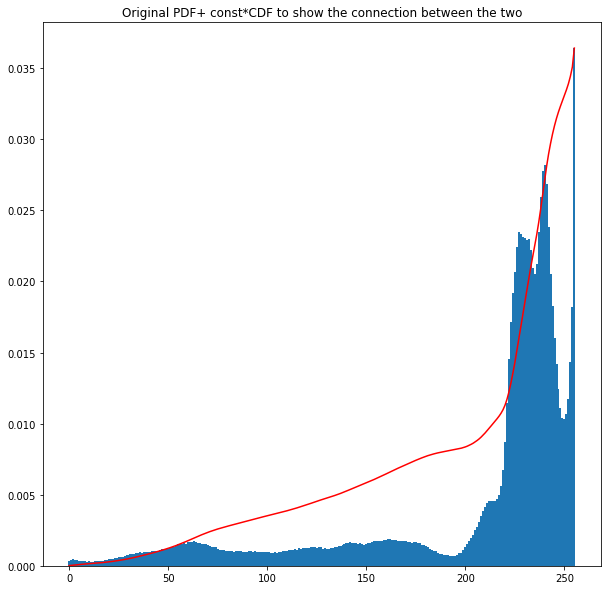

In [ ]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()



The final step is to un-normalize the CDF to become the equalization function


In [ ]:
f_eq = np.round(cdf * 255).astype(int)

f_eq


array([  0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   3,
         3,   3,   3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,
         6,   6,   6,   6,   7,   7,   7,   7,   8,   8,   8,   9,   9,
         9,  10,  10,  10,  11,  11,  12,  12,  12,  13,  13,  14,  14,
        15,  15,  15,  16,  16,  16,  17,  17,  17,  18,  18,  18,  19,
        19,  19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,
        22,  23,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,
        26,  26,  26,  26,  27,  27,  27,  27,  28,  28,  28,  29,  29,
        29,  29,  30,  30,  30,  31,  31,  31,  32,  32,  32,  33,  33,
        33,  34,  34,  34,  35,  35,  35,  36,  36,  36,  37,  37,  38,
        38,  38,  39,  39,  40,  40,  40,  41,  41,  42,  42,  43,  43,
        43,  44,  44,  45,  45,  46,  46,  47,  47,  48,  48,  48,  49,
        49,  50,  50,  51,  51,  52,  52,  52,  53,  53,  54,  5

Use the equalization function to get the equalized image


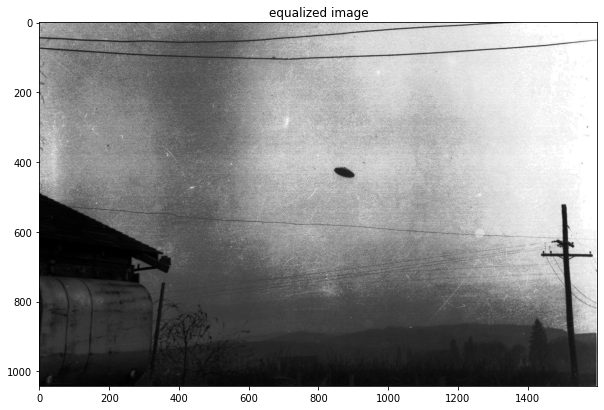

In [ ]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()



Plot the equalized histogram, PDF and CDF


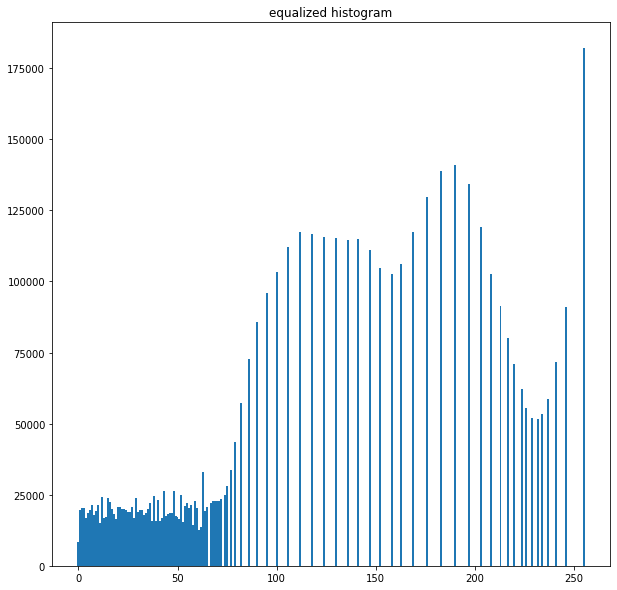

In [ ]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()



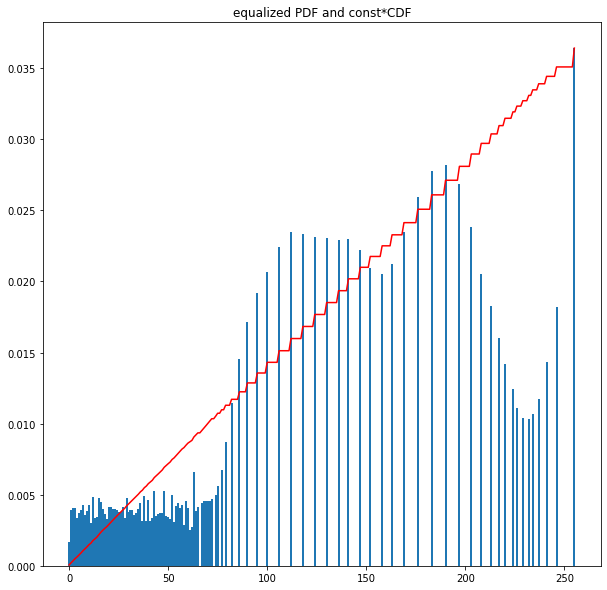

In [ ]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()



## cv2 histogram equalization function


In [ ]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()



error: ignored